<a href="https://colab.research.google.com/github/Giathi-Daniel/Data-Science/blob/main/Road%20Accident%20Severity%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import neccessary libraries and modules
import numpy as py
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# sample dataset
data = pd.DataFrame({
    'Speed': [60, 80, 100, 55, 70, 45],
    'Weather': [0, 1, 0, 0, 2, 1],
    'Road_Type': [1, 0, 1, 0, 1, 0],
    'Time_of_Day': [13, 21, 7, 15, 3, 18],
    'Alcohol': [0, 1, 0, 0,1, 0],
    'Driver_Age': [30, 45, 22, 28, 35, 40],
    'Vehicle_Type': [0, 2, 1, 0, 0, 1],
    'Vehicles_Involved': [1, 2, 3, 1, 2, 1],
    'Seatbelt': [1, 0, 1, 1, 0, 1],
    'Accident_Severity': [1, 3, 2, 1, 3, 2] # dependent variable
})

In [3]:
# Splitting dataset into features (X) and target (y)
X = data[['Speed', 'Weather', 'Road_Type', 'Time_of_Day', 'Alcohol', 'Driver_Age', 'Vehicle_Type', 'Vehicles_Involved', 'Seatbelt']]
y = data['Accident_Severity']

In [4]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Building the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
# Predicting using the test set
y_pred = model.predict(X_test)

In [7]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [8]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.1989372707786797
R-squared Score: 0.8010627292213203


In [9]:
# Hypothetical scenario
sample_data = pd.DataFrame({
    'Speed': [75],
    'Weather': [1],
    'Road_Type': [0],
    'Time_of_Day': [14],
    'Alcohol': [0],
    'Driver_Age': [35],
    'Vehicle_Type': [1],
    'Vehicles_Involved': [2],
    'Seatbelt': [1]
})

# Predicting accident severity
predicted_severity = model.predict(sample_data)
print(f"Predicted Accident Severity: {predicted_severity}")

Predicted Accident Severity: [2.4603368]


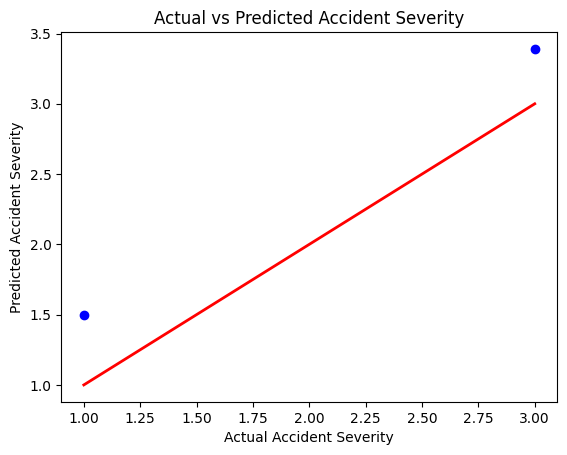

In [10]:
# Visualizing the Model's Predictions vs Actual Values
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Accident Severity')
plt.ylabel('Predicted Accident Severity')
plt.title('Actual vs Predicted Accident Severity')
plt.show()

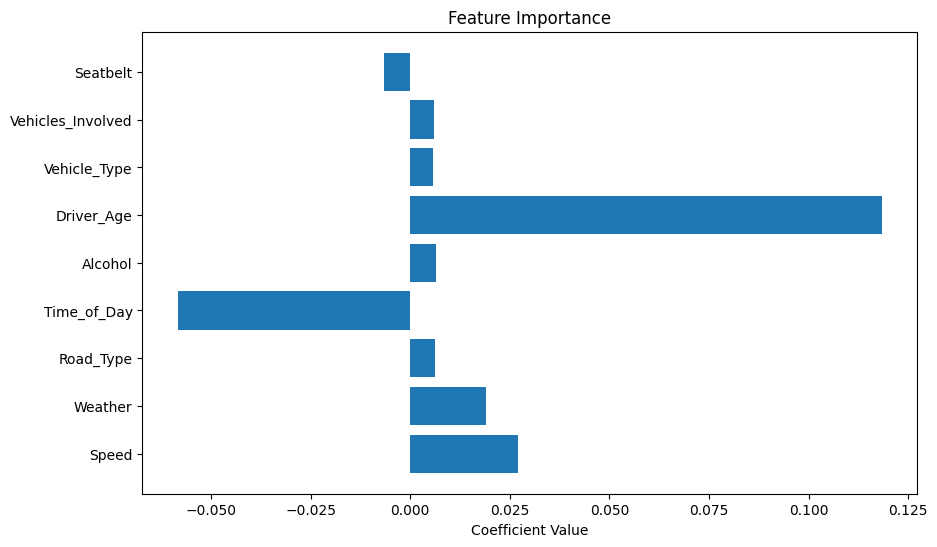

In [11]:
# Visualizing feature importance (Using Coefficients)

importance = model.coef_

# visualize feature importance
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, importance)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance')
plt.show()

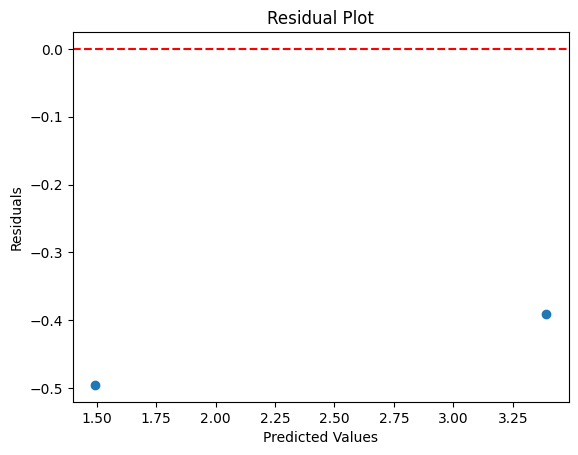

In [12]:
# Visualize Model Residuals to assess the model performance
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

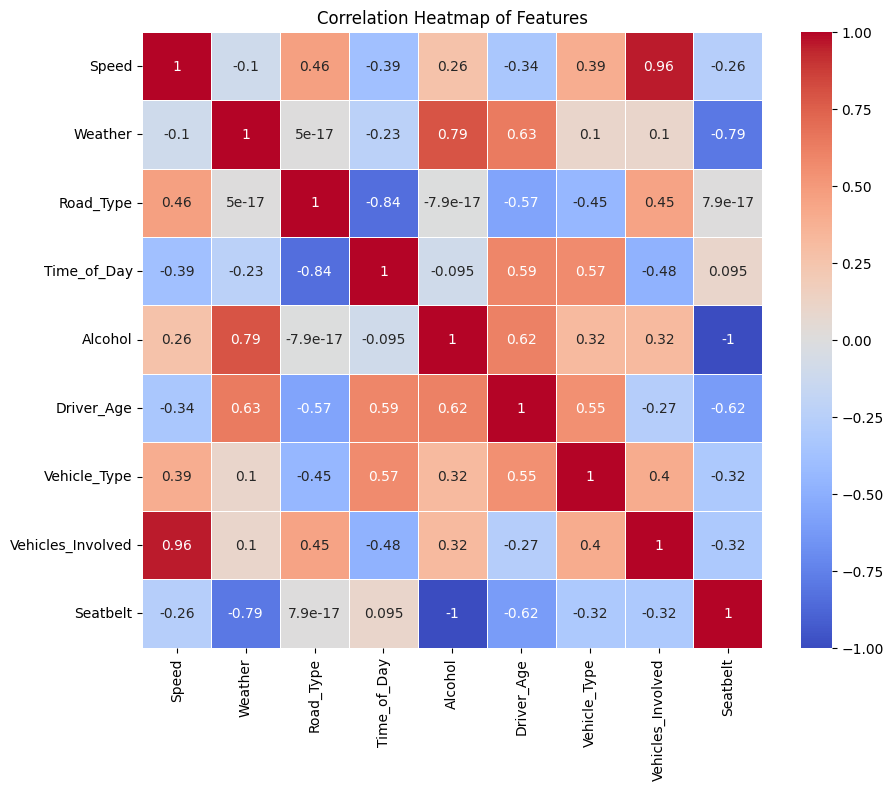

In [13]:
# correlation Heatmap of Features
import seaborn as sns

correlation_matrix = X.corr()

# Plotting Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()